In [33]:
import seaborn as sns
import sklearn.metrics as sm


def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )


  sns.set(rc={'figure.figsize':(8,8)})
  sns.regplot(x="Actual_Value", y="Predicted_Value", data=pred_y_df)


def res(y_actual,y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))


In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error

dataset = pd.read_excel("/content/DATA SET.xlsx")

In [11]:
dataset

,Fabric Type,Cotton%,Polyester%,Spandex%,Cotton Count,Polyester Count,Spandex Count,Cotton SL,Polyester SL,Spandex SL,F/Dia,F/GSM,Color Range,Length Shrinkage%,Width Shrinkage%,Spirality,MC Dia,MC Gauge
0,TERRY,100,0,0,24,0.00,0.00,2.90,0.00,0.0,70,240,Light,-2.0,-5.0,2.4,32,24
1,TERRY,100,0,0,24,0.00,0.00,2.90,0.00,0.0,66,240,Light,-3.0,-4.3,0.5,30,24
2,TERRY,100,0,0,24,0.00,0.00,2.90,0.00,0.0,70,240,Light,-6.1,-3.0,0.5,32,24
3,TERRY,100,0,0,24,0.00,0.00,2.90,0.00,0.0,66,240,Light,-5.6,-4.3,2.3,30,24
4,TERRY,70,30,0,32,70.86,0.00,4.50,1.65,0.0,72,280,White,-2.5,-6.0,3.5,30,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,RIB,100,0,0,28,0.00,0.00,2.62,0.00,0.0,76,225,Average,-4.1,-8.0,5.0,40,18
90,RIB,100,0,0,28,0.00,0.00,2.62,0.00,0.0,76,225,Black,-1.3,-11.0,5.0,40,18
91,RIB,95,0,5,34,0.00,177.15,2.90,0.00,1.3,50,240,Wash,-3.0,-5.0,4.5,42,18
92,RIB,95,0,5,34,0.00,177.15,2.90,0.00,1.3,50,240,Wash,-3.5,-4.0,2.0,42,18


In [12]:
dataset.shape

(94, 18)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fabric Type        94 non-null     object 
 1   Cotton%            94 non-null     int64  
 2   Polyester%         94 non-null     int64  
 3   Spandex%           94 non-null     int64  
 4   Cotton Count       94 non-null     int64  
 5   Polyester Count    94 non-null     float64
 6   Spandex Count      94 non-null     float64
 7   Cotton SL          94 non-null     float64
 8   Polyester SL       94 non-null     float64
 9   Spandex SL         94 non-null     float64
 10  F/Dia              94 non-null     int64  
 11  F/GSM              94 non-null     int64  
 12  Color Range        94 non-null     object 
 13  Length Shrinkage%  94 non-null     float64
 14  Width Shrinkage%   94 non-null     float64
 15  Spirality          94 non-null     float64
 16  MC Dia             94 non-nu

In [14]:
dataset["Cotton SL"] = dataset["Cotton SL"].astype(float)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["Fabric Type"]=encoder.fit_transform(dataset["Fabric Type"])
dataset["Color Range"]=encoder.fit_transform(dataset["Color Range"])

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fabric Type        94 non-null     int64  
 1   Cotton%            94 non-null     int64  
 2   Polyester%         94 non-null     int64  
 3   Spandex%           94 non-null     int64  
 4   Cotton Count       94 non-null     int64  
 5   Polyester Count    94 non-null     float64
 6   Spandex Count      94 non-null     float64
 7   Cotton SL          94 non-null     float64
 8   Polyester SL       94 non-null     float64
 9   Spandex SL         94 non-null     float64
 10  F/Dia              94 non-null     int64  
 11  F/GSM              94 non-null     int64  
 12  Color Range        94 non-null     int64  
 13  Length Shrinkage%  94 non-null     float64
 14  Width Shrinkage%   94 non-null     float64
 15  Spirality          94 non-null     float64
 16  MC Dia             94 non-nu

#Regression Model for `MC Dia`

In [20]:
list(dataset.columns)

['Fabric Type',
 'Cotton%',
 'Polyester%',
 'Spandex%',
 'Cotton Count',
 'Polyester Count',
 'Spandex Count',
 'Cotton SL',
 'Polyester SL',
 'Spandex SL',
 'F/Dia',
 'F/GSM',
 'Color Range',
 'Length Shrinkage%',
 'Width Shrinkage%',
 'Spirality',
 'MC Dia',
 'MC Gauge']

In [21]:
feature_columns = ['Fabric Type',
 'Cotton%',
 'Polyester%',
 'Spandex%',
 'Cotton Count',
 'Polyester Count',
 'Spandex Count',
 'Cotton SL',
 'Polyester SL',
 'Spandex SL',
 'F/Dia',
 'F/GSM',
 'Color Range',
 'Length Shrinkage%',
 'Width Shrinkage%',
 'Spirality']

X = dataset.loc[:,feature_columns]
y = dataset['MC Dia']

In [22]:
X

,Fabric Type,Cotton%,Polyester%,Spandex%,Cotton Count,Polyester Count,Spandex Count,Cotton SL,Polyester SL,Spandex SL,F/Dia,F/GSM,Color Range,Length Shrinkage%,Width Shrinkage%,Spirality
0,11,100,0,0,24,0.00,0.00,2.90,0.00,0.0,70,240,3,-2.0,-5.0,2.4
1,11,100,0,0,24,0.00,0.00,2.90,0.00,0.0,66,240,3,-3.0,-4.3,0.5
2,11,100,0,0,24,0.00,0.00,2.90,0.00,0.0,70,240,3,-6.1,-3.0,0.5
3,11,100,0,0,24,0.00,0.00,2.90,0.00,0.0,66,240,3,-5.6,-4.3,2.3
4,11,70,30,0,32,70.86,0.00,4.50,1.65,0.0,72,280,7,-2.5,-6.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,5,100,0,0,28,0.00,0.00,2.62,0.00,0.0,76,225,0,-4.1,-8.0,5.0
90,5,100,0,0,28,0.00,0.00,2.62,0.00,0.0,76,225,1,-1.3,-11.0,5.0
91,5,95,0,5,34,0.00,177.15,2.90,0.00,1.3,50,240,6,-3.0,-5.0,4.5
92,5,95,0,5,34,0.00,177.15,2.90,0.00,1.3,50,240,6,-3.5,-4.0,2.0


In [23]:
y

0     32
1     30
2     32
3     30
4     30
      ..
89    40
90    40
91    42
92    42
93    34
Name: MC Dia, Length: 94, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [48]:
# Assuming X is your feature matrix and y is your target variable
regressor = LinearRegression()
regressor.fit(X_train, y_train)

pred_train= regressor.predict(X_train)
print("Trainng Result")
res(y_train,pred_train)


pred_test= regressor.predict(X_test)
print("Testing Result")
res(y_test,pred_test)

# Get the coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

Trainng Result
Mean absolute error = 1.9
Mean squared error = 7.14
Median absolute error = 1.23
Explain variance score = 0.68
R2 score = 0.68
Testing Result
Mean absolute error = 1.68
Mean squared error = 4.1
Median absolute error = 1.8
Explain variance score = 0.83
R2 score = 0.82


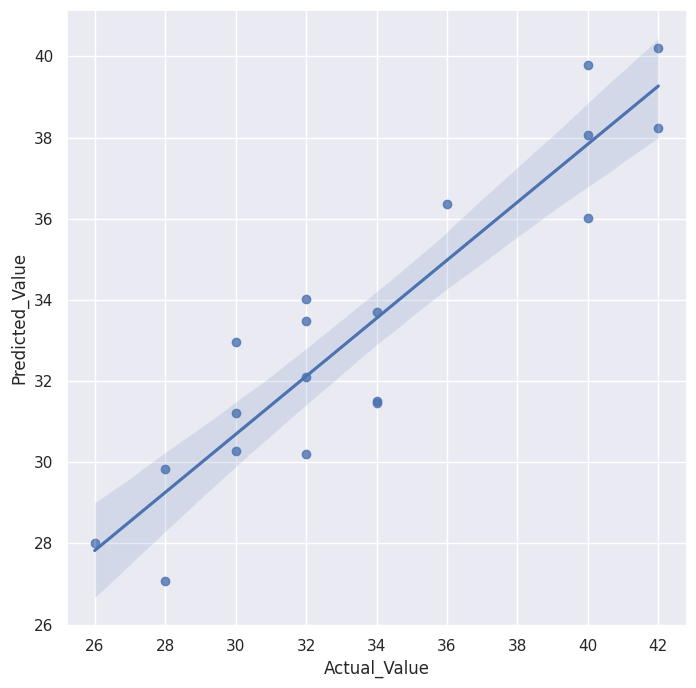

In [35]:
prim_plot(y_test,pred_test)

In [37]:
dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.003)
dtree.fit(X_train, y_train)

pred_train= dtree.predict(X_train)
print("Trainng Result")
res(y_train,pred_train)

print()

pred_test= dtree.predict(X_test)
print("Trainng Result")
res(y_test,pred_test)

Trainng Result
Mean absolute error = 1.36
Mean squared error = 3.57
Median absolute error = 1.78
Explain variance score = 0.84
R2 score = 0.84

Trainng Result
Mean absolute error = 1.92
Mean squared error = 8.97
Median absolute error = 1.78
Explain variance score = 0.64
R2 score = 0.61


In [ ]:
for i in range(1,1000):
  l=i/1000
  print("------------------------------------------------------")
  dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=l)
  dtree.fit(X_train, y_train)
  pred_test_tree= dtree.predict(X_test)
  k = r2_score(y_test, pred_test_tree)
  if k>0:
    print(k,l)

In [42]:
#RF model
model_rf = RandomForestRegressor(n_estimators=1, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train)



print("Training")
pred_train= model_rf.predict(X_train)
res(y_train,pred_train)



print("Testing")
pred_test = model_rf.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 0.16
Mean squared error = 0.43
Median absolute error = 0.0
Explain variance score = 0.98
R2 score = 0.98
Testing
Mean absolute error = 0.95
Mean squared error = 2.74
Median absolute error = 0.0
Explain variance score = 0.91
R2 score = 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [43]:

for i in range(1,300):
  model_rf = RandomForestRegressor(n_estimators=i)
  model_rf.fit(X_train, y_train)
  pred_test_rf= model_rf.predict(X_test)
  k = r2_score(y_test, pred_test_rf)
  if k>0:
    print("------------------------------------------------------")
    print(k,i)

------------------------------------------------------
0.7449664429530201 1
------------------------------------------------------
0.8337727708533077 2
------------------------------------------------------
0.6963886225631191 3
------------------------------------------------------
0.8371883988494726 4
------------------------------------------------------
0.6808437200383508 5
------------------------------------------------------
0.595943858527751 6
------------------------------------------------------
0.7825151153462344 7
------------------------------------------------------
0.7119487056567593 8
------------------------------------------------------
0.786122651894464 9
------------------------------------------------------
0.7550767018216682 10
------------------------------------------------------
0.6781217562181563 11
------------------------------------------------------
0.8156193405773942 12
------------------------------------------------------
0.6639614902392392 13
----------

In [47]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=0.1)
regr.fit(X_train, y_train)

print("Training")
pred_train= regr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 2.01
Mean squared error = 7.53
Median absolute error = 1.36
Explain variance score = 0.66
R2 score = 0.66
Testing
Mean absolute error = 1.97
Mean squared error = 5.52
Median absolute error = 1.69
Explain variance score = 0.77
R2 score = 0.76
